In [31]:
# read the data from txt file
f = open("signal.txt", 'r')
data = f.read().split(',')
f.close()
data[-1] = data[-1].strip('\n')
#data

In [32]:
# transform the data type from string to float
samples = []
for i in data:
    samples.append(float(i))
len(samples)

100

In [33]:
import numpy as np
k=1
N=len(samples)
n = np.arange(N)
cos1 = np.cos(2*np.pi*n*k/N)
sin1 = np.sin(2*np.pi*n*k/N)

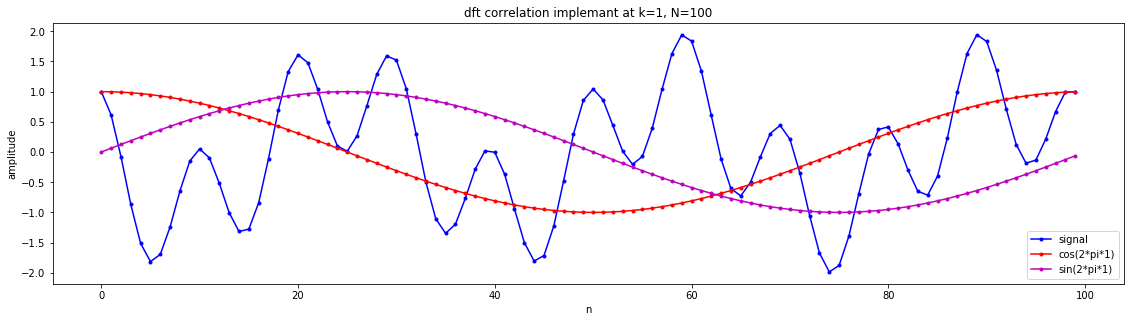

In [52]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6.4*3, 4.8))
plt.plot(samples, 'b.-')
plt.title("dft correlation implemant at k=1, N=100")
plt.xlabel("n")
plt.ylabel("amplitude")

plt.plot(cos1, 'r.-')
plt.plot(sin1, 'm.-')
plt.legend(["signal", "cos(2*pi*1)", "sin(2*pi*1)"], loc="lower right")

plt.show()

In [74]:
# create the dft model after learning the signal processing
def DFT_slow(x):
    N = len(x)
    n = np.arange(N)
    k = n.reshape((N,1))
    complex_exp = np.exp(-2j*np.pi*n*k/N)
    return np.dot(complex_exp, x)

In [75]:
# test the corretion of the model
x = np.random.random(1024)
np.allclose(DFT_slow(x), np.fft.fft(x))

True

In [76]:
# compared the computation time
%timeit DFT_slow(x)
%timeit np.fft.fft(x)

83.4 ms ± 1.22 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
6.19 µs ± 75.7 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [87]:
xk = np.fft.fft(samples)
for i in range(1, 5):
    print("value at index {}:\t{}".format(i, xk[i]), "\nvalue at index {}:\t{}".format(N-i, xk[-i]))

value at index 1:	(0.9976447039067805+0.4008052843845826j) 
value at index 99:	(0.9976447039067805-0.4008052843845826j)
value at index 2:	(0.9648376199895231+1.2296259751945442j) 
value at index 98:	(0.9648376199895231-1.2296259751945442j)
value at index 3:	(-3.58424094428921+49.55475283985316j) 
value at index 97:	(-3.58424094428921-49.55475283985316j)
value at index 4:	(1.3964012287476995-1.6150530132834302j) 
value at index 96:	(1.3964012287476995+1.6150530132834302j)


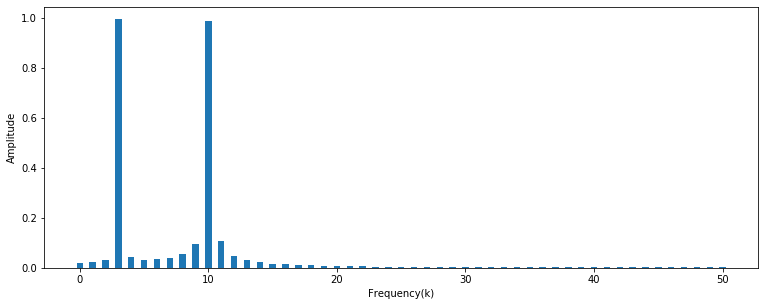

In [109]:
# f = np.linspace(0, 8, 8, endpoint=False)
N = len(xk)
k = np.arange(N)
absx = np.abs(xk)
plt.figure(figsize=(6.4*2, 4.8))
# i saw somebody said it is xk[:N//2], but i think it is N//2+1
plt.bar(k[:N//2+1], absx[:N//2+1]/N*2, width=0.5)
plt.xlabel("Frequency(k)")
plt.ylabel("Amplitude")
plt.show()

In [113]:
absx[0]
# xk[0]

1.0000030000000022

In [99]:
# make sure the symmetric, when number N is odd and even.
test1 = np.random.random(9)
test2 = np.random.random(10)
f1 = np.fft.fft(test1)
f2 = np.fft.fft(test2)

In [100]:
N = len(f1)
for i in range(1, 6):
    print("value at index {}:\t{}".format(i, f1[i]), "\nvalue at index {}:\t{}".format(N-i, f1[-i]))

value at index 1:	(-0.6518655818046681+0.5952697734027157j) 
value at index 8:	(-0.6518655818046681-0.5952697734027157j)
value at index 2:	(0.16075463025864278-0.7461633113481461j) 
value at index 7:	(0.16075463025864278+0.7461633113481461j)
value at index 3:	(-0.13282258801676816-0.6113126889629072j) 
value at index 6:	(-0.13282258801676816+0.6113126889629072j)
value at index 4:	(1.409956691239104+0.7327821621748882j) 
value at index 5:	(1.409956691239104-0.7327821621748882j)
value at index 5:	(1.409956691239104-0.7327821621748882j) 
value at index 4:	(1.409956691239104+0.7327821621748882j)


In [102]:
N = len(f2)
for i in range(1, 6):
    print("value at index {}:\t{}".format(i, f2[i]), "\nvalue at index {}:\t{}".format(N-i, f2[-i]))

value at index 1:	(0.18160723393494188-0.1798437644913718j) 
value at index 9:	(0.18160723393494188+0.1798437644913718j)
value at index 2:	(-0.03864576689025126+0.7599656173799263j) 
value at index 8:	(-0.03864576689025126-0.7599656173799263j)
value at index 3:	(0.424967293735668-0.6591712213462997j) 
value at index 7:	(0.424967293735668+0.6591712213462997j)
value at index 4:	(1.0658302866563925-0.5546040137513524j) 
value at index 6:	(1.0658302866563925+0.5546040137513524j)
value at index 5:	(1.6870971714008718+0j) 
value at index 5:	(1.6870971714008718+0j)


In [124]:
test1 = np.random.random(1024*1024)
test2 = np.random.random(1023*1024)

In [125]:
%timeit np.fft.fft(test1)
%timeit np.fft.fft(test2)

8.62 ms ± 65.2 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
13.9 ms ± 43 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [122]:
k1 = np.fft.fft(test1)
k2 = np.fft.fft(test2)
print(len(k1))
print(len(k2))

65536
65472
